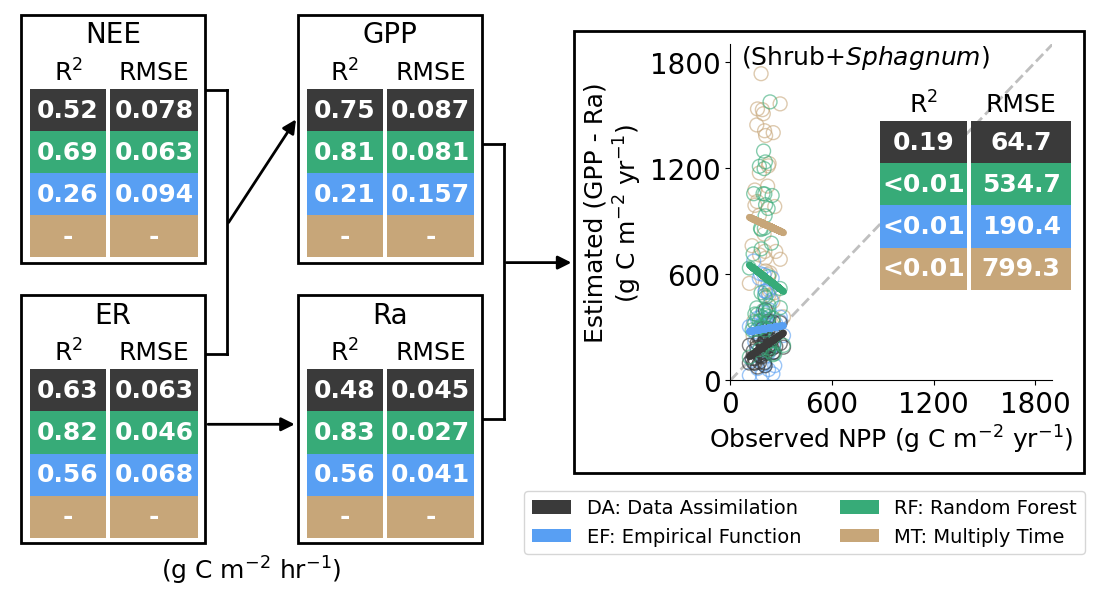

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# ------------------------------
# 1. Figure and layout settings
# ------------------------------
fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('off')

# Base positions and sizes
base_x, base_y  = 0.01,  0.01
base_w, base_h  = 0.17,  0.46
space_h = 0.085
large_y = 0.14
large_w, large_h = 1 - base_x - base_w*2 - space_h*2 - 0.01, 0.82
high_x, high_y = base_x + base_w + space_h, 1 - base_y - base_h

rect_positions = [
    (base_x, high_y), 
    (high_x, high_y),
    (base_x, base_y),
    (high_x, base_y),
    (base_x + base_w*2 + space_h*2, large_y)
]

# ------------------------------
# 2. Draw main rectangles
# ------------------------------
for idx, (x, y) in enumerate(rect_positions):
    w, h = (base_w, base_h) if idx < 4 else (large_w, large_h)
    rect = patches.Rectangle((x, y), w, h, transform=ax.transAxes,
                             edgecolor="k", linewidth=2, facecolor='none')
    ax.add_patch(rect)

# ------------------------------
# 3. Draw small break lines
# ------------------------------
duan_l = 0.02
line_coords = [
    ([base_x+base_w+0.001, base_x+base_w+duan_l], [0.85, 0.85]),
    ([base_x+base_w+0.001, base_x+base_w+duan_l], [0.36, 0.36]),
    ([base_x+base_w*2+space_h+0.001, base_x+base_w*2+space_h+duan_l], [0.75, 0.75]),
    ([base_x+base_w*2+space_h+0.001, base_x+base_w*2+space_h+duan_l], [0.24, 0.24])
]

for x_coords, y_coords in line_coords:
    ax.add_line(Line2D(x_coords, y_coords, color='k', linewidth=2))

# Vertical connecting lines
ax.add_line(Line2D([base_x+base_w+duan_l]*2, [0.36, 0.85], color='k', linewidth=2))
ax.add_line(Line2D([base_x+base_w*2+space_h+duan_l]*2, [0.24, 0.75], color='k', linewidth=2))

# ------------------------------
# 4. Draw arrows
# ------------------------------
arrow_coords = [
    ((base_x+base_w+duan_l, 0.6), (base_x+base_w+space_h, 0.8)),
    ((base_x+base_w*2+space_h+duan_l, 0.53), (base_x+base_w*2+space_h*2, 0.53)),
    ((base_x+base_w, 0.23), (base_x+base_w+space_h, 0.23))
]

for start, end in arrow_coords:
    arrow = patches.FancyArrowPatch(start, end, color='k', linewidth=2, 
                                    arrowstyle='-|>', mutation_scale=20)
    ax.add_patch(arrow)

# ------------------------------
# 5. Plot NPP scatter with regression
# ------------------------------
df_all_data = pd.read_excel("3_data_explain_DA/2_data4plot_NPP.xlsx")
all_methods = ["da", "ml", "ef", "mt"]
# dict_colors = {"da": "#3A3A3A", "ml": "#C7A679", "ef": "#2E85CC", "mt": "#018A67"}
# dict_colors = {"da": "#57978d", "ml": "#90BC95", "ef": "#A9CA9E", "mt": "#D7DEC0"}
# dict_colors = {"da": "#3d5b7f", "ml": "#57978d", "ef": "#90BC95", "mt": "#A9CA9E"}
# dict_colors = {"da": "#E07F86", "ml": "#8FA2CD", "ef": "#F8BC7E", "mt": "#CC976B"}
# dict_colors = {"da": "#C93735", "ml": "#F8AB61", "ef": "#78A9CD", "mt": "#333A8C"}
# dict_colors = {"da": "#85B0A9", "ml": "#E39CB1", "ef": "#EFDA8E", "mt": "#969DC7"}
# dict_colors = {"da": "#6F6F6F", "ml": "#8FB4DC", "ef": "#70CDBE", "mt": "#AC99D2"}
dict_colors = {"da": "#3A3A3A", "ml": "#37ab78", "ef": "#589ff3", "mt": "#C7A679"} 
dict_s = {"da": 100, "ml": 100, "ef": 100, "mt": 100}
dict_alpha = {"da": 0.65, "ml": 0.6, "ef": 0.6, "mt": 0.6}
dict_zorder = {"da": 4, "ml": 4, "ef": 3, "mt": 2}
dict_zorder_line = {"da": 8, "ml": 7, "ef": 6, "mt": 5}

# Axes for NPP scatter plot
ax_fig = fig.add_axes([(base_x + base_w*2+space_h*2)*1.23, large_y*2.5, 0.23, 0.48])
ax.set_zorder(2)
ax_fig.set_zorder(1)
xmin, xmax, ymin, ymax = 0, 1900, 0, 1900
ax_fig.set_xlim(xmin, xmax)
ax_fig.set_ylim(ymin, ymax)

# 1:1 line
ax_fig.plot([xmin, xmax], [xmin, xmax], color='grey', linestyle='--', alpha=0.5, linewidth=2)

dat_obs = df_all_data["obs"].values
dict_npp_r2_rmse = {}

for method in all_methods:
    dat_method = df_all_data[method].values
    ax_fig.scatter(dat_obs, dat_method, edgecolors=dict_colors[method], facecolors='none',
                   s=dict_s[method], alpha=dict_alpha[method], zorder=dict_zorder[method])
    
    # Regression and metrics
    dat_vs = df_all_data[["obs", method]].dropna()
    x_with_const = sm.add_constant(dat_vs["obs"].values) 
    model = sm.OLS(dat_vs[method].values, x_with_const).fit()
    r_squared = model.rsquared
    rmse = np.sqrt(mean_squared_error(dat_vs["obs"].values, dat_vs[method].values))
    dict_npp_r2_rmse[method] = (f"{r_squared:.2f}", f"{rmse:.1f}") if r_squared > 0.01 else ("<0.01", f"{rmse:.1f}")
    
    # Regression line
    reg2 = LinearRegression().fit(dat_vs["obs"].values.reshape(-1,1), dat_vs[method].values)
    ax_fig.plot(dat_vs["obs"].values, reg2.predict(dat_vs["obs"].values.reshape(-1,1)),
                color=dict_colors[method], linewidth=5, zorder=dict_zorder_line[method])

# Axes labels
# ax_fig.set_xlabel(r'Observed $\mathbf{NPP}$ (g C m$^{-2}$ yr$^{-1}$)', fontsize=18)
# ax_fig.set_ylabel(r'Estimated $\mathbf{(GPP - Ra)}$' '\n' r'(g C m$^{-2}$ yr$^{-1}$)', fontsize=18)
ax_fig.set_xlabel(r'Observed NPP (g C m$^{-2}$ yr$^{-1}$)', fontsize=18)
ax_fig.set_ylabel(r'Estimated (GPP - Ra)' '\n' r'(g C m$^{-2}$ yr$^{-1}$)', fontsize=18)
ax_fig.tick_params(axis='both', labelsize=20)
ax_fig.spines['top'].set_visible(False)
ax_fig.spines['right'].set_visible(False)
ax_fig.set_xticks([0, 600, 1200, 1800])
ax_fig.set_yticks([0, 600, 1200, 1800])

# Legend
legend_elements = [
    Patch(facecolor=dict_colors["da"], label='DA: Data Assimilation'),
    Patch(facecolor=dict_colors["ef"], label='EF: Empirical Function'),
    Patch(facecolor=dict_colors["ml"], label='RF: Random Forest'),
    Patch(facecolor=dict_colors["mt"], label='MT: Multiply Time'),
]
ax_fig.legend(handles=legend_elements, ncol=2, loc='upper left',
              bbox_to_anchor=(-0.67, -0.3), fontsize=14)

# -----------------------------
# 5-2. Get R2 / RMSE of NEE, ER, GPP, and Ra
# -----------------------------
ls_vars_ef = ["NEE", "GPP", "ER", "Ra"]
ls_vars_ml = ["nee", "gpp", "er", "ra"]
rect_w, rect_h = 0.067, 0.095
ls_vals = ["da", "ml", "ef", "mt"]  # for coloring
# data ----------------------------------
dict_vars_r2_rmse = {}
for idx_var in range(4):
    dat_ef = pd.read_excel(f"3_data_explain_DA/2-2_res_EF/simu_vs_obs_{ls_vars_ef[idx_var]}.xlsx")
    x_ef = dat_ef["mean"].values
    y_ef = dat_ef["CO2_flux_fit"].values if ls_vars_ef[idx_var] in ["ER", "Ra"] else dat_ef["simu"].values
    # -----------
    dat_ml = pd.read_excel(f"3_data_explain_DA/2-3_res_RF/4_simu_vs_obs_{ls_vars_ml[idx_var]}.xlsx")
    x_ml = dat_ml["mean"].values
    y_ml = dat_ml[ls_vars_ml[idx_var]].values
    # ----------- DA ------------
    dat_da = pd.read_excel(f"3_data_explain_DA/2-4_res_DA/data_simu_obs_{ls_vars_ml[idx_var]}.xlsx")
    x_da = dat_da["obs"].values
    y_da = dat_da["simu"].values
    dict_vars_r2_rmse[ls_vars_ml[idx_var]] = {}
    for idx_val, (x_val, y_val) in enumerate([(x_da, y_da), (x_ml, y_ml), (x_ef, y_ef), (0,0)]):
        if idx_val < 3:
            x_with_const = sm.add_constant(x_val) 
            model = sm.OLS(y_val, x_with_const).fit()
            r2_value = model.rsquared
            str_R2 = f"{r2_value:.2f}"
            rmse = np.sqrt(mean_squared_error(x_val, y_val))
            str_rmse = f"{rmse:.3f}"
        else:
            str_R2 = "-"
            str_rmse = "-"
        dict_vars_r2_rmse[ls_vars_ml[idx_var]][ls_vals[idx_val]] = (str_R2, str_rmse)

# ------------------------------
# 6. Function to draw R² / RMSE rectangles
# ------------------------------
def draw_r2_rmse(ax, rect_x, rect_y, methods, colors, r2_rmse_dict, rect_w=0.07, rect_h=0.078):
    """Draw colored R² / RMSE rectangles with text for given methods"""
    # ax.add_line(Line2D([rect_x + 0.5*rect_w, rect_x + 1.5*rect_w], 
    #                    [rect_y + 2*rect_h, rect_y + 2*rect_h], color='k', linewidth=2))
    # draw R2 and RMSE
    ax.text(rect_x + 0.5*rect_w, rect_y + 1.4*rect_h, "R$^2$",
                ha="center", va="center", transform=ax.transAxes, fontsize=18,  color="k")
    ax.text(rect_x + rect_w + 0.004 + 0.5*rect_w*1.15, rect_y + 1.4*rect_h, "RMSE",
            ha="center", va="center", transform=ax.transAxes, fontsize=18,  color="k")
    for idx, method in enumerate(methods):
        # Draw rectangles
        rect_r2 = patches.Rectangle((rect_x, rect_y-rect_h*idx), rect_w, rect_h,
                                    transform=ax.transAxes, facecolor=colors[method])
        rect_rmse = patches.Rectangle((rect_x + rect_w + 0.004, rect_y-rect_h*idx),
                                      rect_w*1.15, rect_h, transform=ax.transAxes, facecolor=colors[method])
        ax.add_patch(rect_r2)
        ax.add_patch(rect_rmse)

        # Text
        str_R2   = r2_rmse_dict[method][0]
        str_rmse = r2_rmse_dict[method][1]
        font_color = "w" #if idx==0 else "k"

        ax.text(rect_x + 0.5*rect_w, rect_y-rect_h*idx + 0.5*rect_h, str_R2,
                ha="center", va="center", transform=ax.transAxes,  fontsize=18, fontweight="bold", color=font_color)
        ax.text(rect_x + rect_w + 0.004 + 0.5*rect_w*1.15, rect_y-rect_h*idx + 0.5*rect_h, str_rmse,
                ha="center", va="center", transform=ax.transAxes,  fontsize=18, fontweight="bold", color=font_color)

# ------------------------------
# 7. Draw rectangles for variables
# ------------------------------
ls_vars = ["NEE", "GPP", "ER", "Ra", "NPP"]
ls_pos  = [(base_x, high_y), (high_x, high_y), (base_x, base_y), (high_x, base_y), (base_x + base_w*2 + space_h*2, large_y)]

ls_vals = ["da", "ml", "ef", "mt"]  # for coloring

for idx_var, var_name in enumerate(ls_vars):
    rect_x, rect_y = ls_pos[idx_var]
    if idx_var < 4:
        rect_x += 0.05*base_w
        rect_y += 0.53*base_h
        draw_r2_rmse(ax, rect_x, rect_y, ls_vals, dict_colors, dict_vars_r2_rmse[ls_vars_ml[idx_var]])
    else:
        rect_x += 0.6*large_w
        rect_y += 0.7*large_h
        draw_r2_rmse(ax, rect_x, rect_y, ls_vals, dict_colors, dict_npp_r2_rmse,rect_w=0.08, rect_h=0.078)

# ------------------------------
# 8. Add variable labels
# ------------------------------
for idx, var in enumerate(ls_vars[:-1]):
    x, y = ls_pos[idx]
    ax.text(x+base_w*0.5, y + base_h*0.92, var, ha="center", va="center", fontsize=20)
    # ax.text(x+base_w*0.15, y + base_h*0.36, "(Shrub\n+\n" + r"$\it{Sphag.}$)", ha="center", va="center", fontsize=14)

# add unit for left variables
ax.text((base_x+base_w + space_h/2), -0.07, r"(g C m$^{-2}$ hr$^{-1}$)", ha="center", va="bottom", transform=ax.transAxes, fontsize=18)
ax_fig.text(0.42, 0.92, r"(Shrub+$\it{Sphagnum}$)", ha="center", va="bottom", transform=ax_fig.transAxes, fontsize=18)
plt.show()